Predicting the price of a house based on its features
- Dataset: California Housing (from sklearn.datasets)

Import datset

Each row in the dataset represents a small area (similar to a neighborhood or statistical block) in which census averages were calculated.

In [13]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# check the first 5 rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


Check the dataset

Problems / obs resulted:
1. Some columns have outliers (Rooms, Occup)
2. The population is very unevenly distributed.
3. MedHouseVal seems truncated at 5.0
4. Geographic data could be grouped

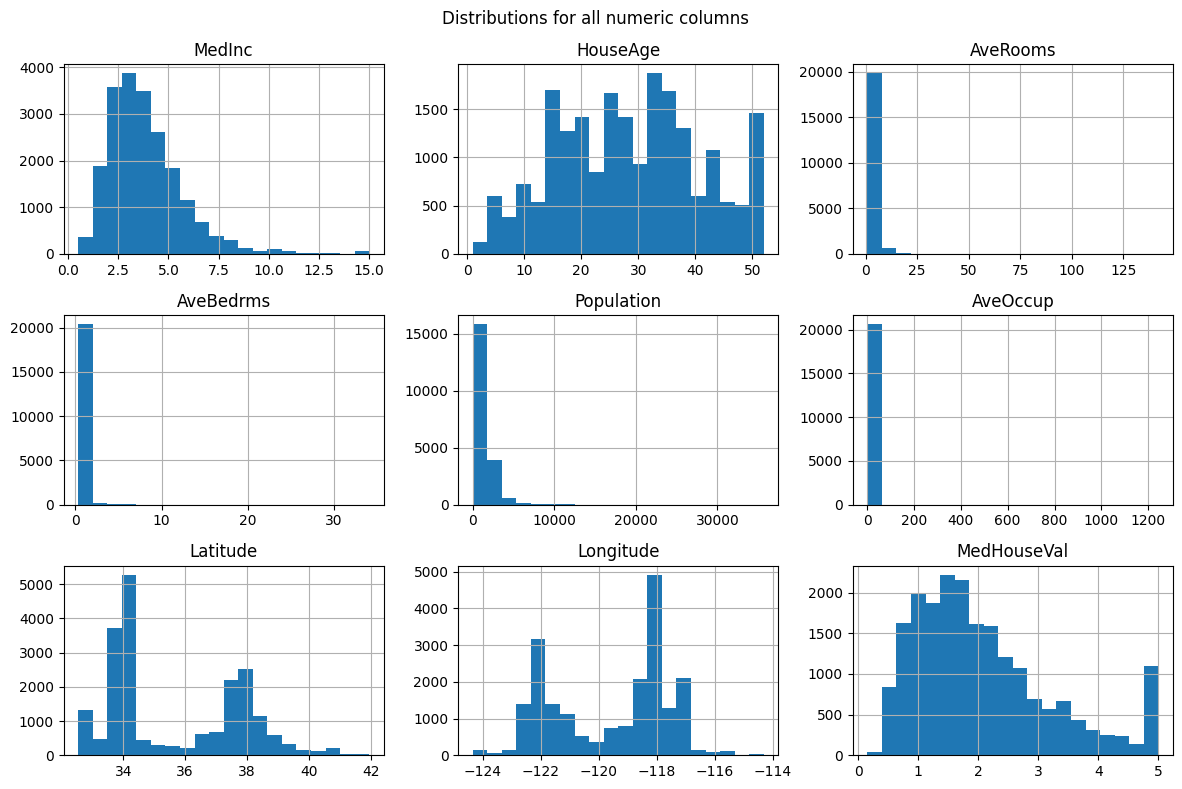

In [14]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distributions for all numeric columns")
plt.tight_layout()
plt.show()


Eliminate data

Inițial: 20640 rânduri
Fără outlieri: 18312 rânduri


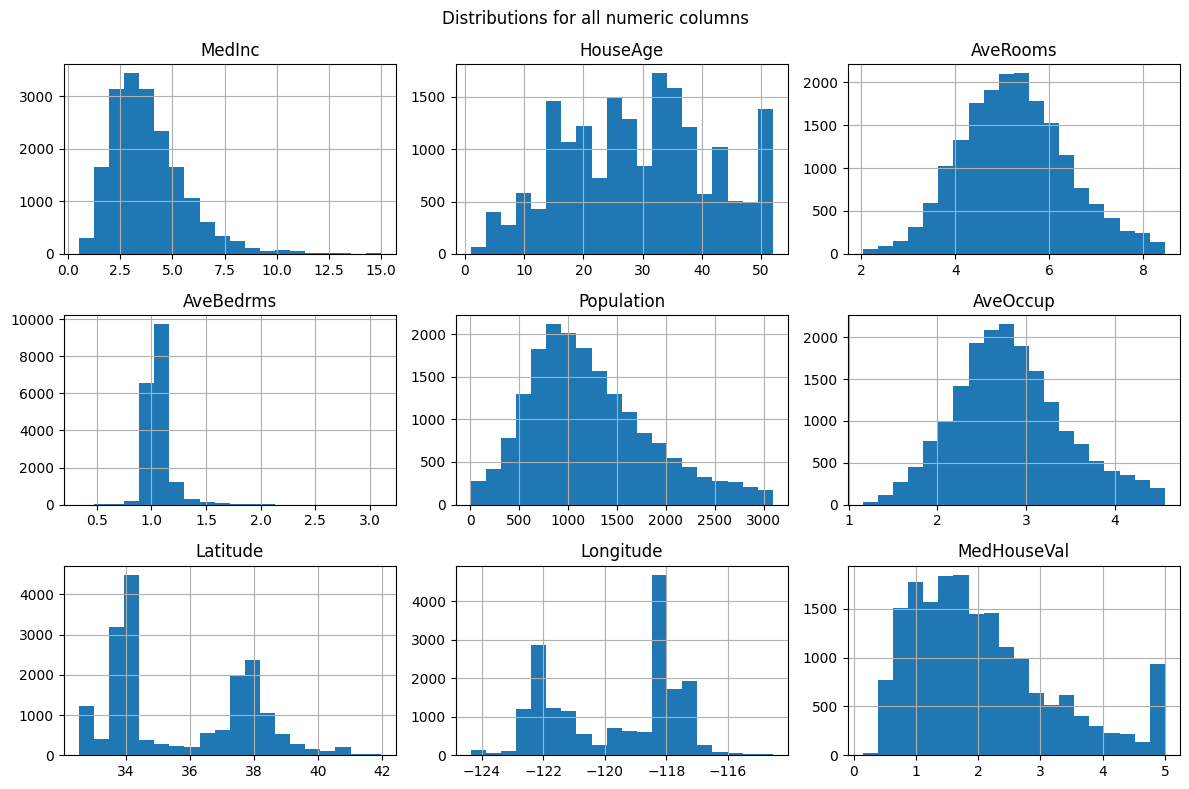

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

columns_to_check = ["AveRooms", "AveOccup", "Population", "HouseAge"]
df_cleaned = remove_outliers_iqr(df, columns_to_check)

print(f"Initial: {df.shape[0]} rows")
print(f"Without outliers: {df_cleaned.shape[0]} rows")

df_cleaned.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distributions for all numeric columns")
plt.tight_layout()
plt.show()
